In [3]:
%matplotlib inline
from pprint import pprint

import plot
import simulate
import harvesting
import market
import withdrawal
import metrics

from decimal import Decimal

import itertools
import math
import pandas
import scipy.stats

In [4]:
YEARS = 5

df = pandas.DataFrame(index=range(1, YEARS+1))

MARKET = market.Returns_US_1871()
for i in range(MARKET.start_year, 2017-YEARS):
    s = simulate.withdrawals(MARKET.iter_from(i), years=YEARS, harvesting=harvesting.N_60_RebalanceHarvesting, withdraw=withdrawal.ConstantDollar)
    pvs = [int(n.portfolio_n) for n in s]
    df[i] = pvs

In [12]:
data = df.T[5]
print(data[1930])
print(scipy.stats.percentileofscore(data, 1100000))

691556
58.1560283688


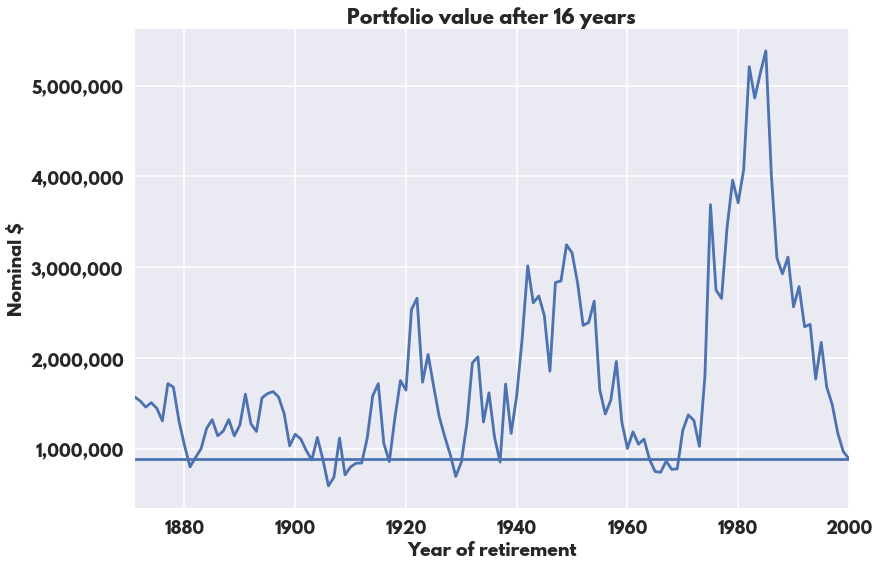

In [12]:
data = df.T[16]
y2k_port = data[2000]

fig, ax1 = plot.plt.subplots()
plot.format_axis_labels_with_commas(ax1.get_yaxis())
ax1.plot([1871, 2000], [y2k_port, y2k_port])
plot.plt.xlabel('Year of retirement')
plot.plt.ylabel('Real $$$')
plot.plt.title('Portfolio value after 16 years')
graph = plot.seaborn.tsplot(data, time=data.index)

In [11]:
data.sort_values()

1906     591633
1907     688339
1929     694856
1909     713066
1966     741217
1965     749658
1968     773499
1969     779749
1910     799842
1881     800417
1911     840887
1912     843452
1937     853437
1930     853463
1917     858221
1967     864302
1903     876869
1964     880805
1905     881474
2000     890398
1882     904498
1928     936675
1999     968337
1902     980057
1883    1000576
1960    1003345
1973    1026602
1899    1032241
1880    1038606
1962    1050490
         ...   
1953    2391108
1945    2466090
1921    2533428
1990    2563378
1943    2606810
1954    2625405
1977    2655347
1922    2657273
1944    2683012
1976    2749182
1991    2786312
1951    2826698
1947    2830428
1948    2848330
1988    2927013
1942    3014758
1987    3101297
1989    3110499
1950    3157222
1949    3246771
1978    3437354
1975    3688045
1980    3709883
1979    3956841
1986    4011119
1981    4074334
1983    4863049
1984    5136965
1982    5208319
1985    5380817
Name: 16, dtype: int64